In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
products = pd.read_csv("products.csv")
products.head()

,id,prices.amountMax,prices.amountMin,prices.availability,prices.condition,prices.currency,prices.dateSeen,prices.isSale,prices.merchant,prices.shipping,...,name,primaryCategories,sourceURLs,upc,weight,Unnamed: 26,Unnamed: 27,Unnamed: 28,Unnamed: 29,Unnamed: 30
0,AVphzgbJLJeJML43fA0o,104.99,104.99,Yes,New,USD,"2017-03-30T06:00:00Z,2017-03-10T22:00:00Z,2017...",False,Bestbuy.com,NaN,...,Sanus VLF410B1 10-Inch Super Slim Full-Motion ...,Electronics,https://www.amazon.com/Sanus-VLF410B1-10-Inch-...,7.93796E+11,32.8 pounds,NaN,NaN,NaN,NaN,NaN
1,AVpgMuGwLJeJML43KY_c,69.00,64.99,In Stock,New,USD,2017-12-14T06:00:00Z,True,Walmart.com,Expedited,...,Boytone - 2500W 2.1-Ch. Home Theater System - ...,Electronics,http://reviews.bestbuy.com/3545/4784804/review...,6.42015E+11,14 pounds,NaN,NaN,NaN,NaN,NaN
2,AVpgMuGwLJeJML43KY_c,69.00,69.00,In Stock,New,USD,2017-09-08T05:00:00Z,False,Walmart.com,Expedited,...,Boytone - 2500W 2.1-Ch. Home Theater System - ...,Electronics,http://reviews.bestbuy.com/3545/4784804/review...,6.42015E+11,14 pounds,NaN,NaN,NaN,NaN,NaN
3,AVpgMuGwLJeJML43KY_c,69.99,69.99,Yes,New,USD,2017-10-10T05:00:00Z,False,Bestbuy.com,NaN,...,Boytone - 2500W 2.1-Ch. Home Theater System - ...,Electronics,http://reviews.bestbuy.com/3545/4784804/review...,6.42015E+11,14 pounds,NaN,NaN,NaN,NaN,NaN
4,AVpgMuGwLJeJML43KY_c,66.99,66.99,Yes,New,USD,2017-08-28T07:00:00Z,False,Bestbuy.com,NaN,...,Boytone - 2500W 2.1-Ch. Home Theater System - ...,Electronics,http://reviews.bestbuy.com/3545/4784804/review...,6.42015E+11,14 pounds,NaN,NaN,NaN,NaN,NaN


In [3]:
products.columns

Index(['id', 'prices.amountMax', 'prices.amountMin', 'prices.availability',
       'prices.condition', 'prices.currency', 'prices.dateSeen',
       'prices.isSale', 'prices.merchant', 'prices.shipping',
       'prices.sourceURLs', 'asins', 'brand', 'categories', 'dateAdded',
       'dateUpdated', 'ean', 'imageURLs', 'keys', 'manufacturer',
       'manufacturerNumber', 'name', 'primaryCategories', 'sourceURLs', 'upc',
       'weight', 'Unnamed: 26', 'Unnamed: 27', 'Unnamed: 28', 'Unnamed: 29',
       'Unnamed: 30'],
      dtype='object')

In [4]:
products["weight"]

0                         32.8 pounds
1                           14 pounds
2                           14 pounds
3                           14 pounds
4                           14 pounds
5                           14 pounds
6                           14 pounds
7                           14 pounds
8                           14 pounds
9                           14 pounds
10                          14 pounds
11                          14 pounds
12                          14 pounds
13                         1.2 pounds
14                         1.2 pounds
15                         1.2 pounds
16                         1.2 pounds
17                         1.2 pounds
18                        13.2 pounds
19                        13.2 pounds
20                        13.2 pounds
21                        13.2 pounds
22                        13.2 pounds
23       1.6 lb 2.6 lb 1.6 lb 18.7 lb
24       1.6 lb 2.6 lb 1.6 lb 18.7 lb
25       1.6 lb 2.6 lb 1.6 lb 18.7 lb
26       1.6

To start working on column "weight", I want to see the unique elements of this column first

In [5]:
products["weight"].unique()

array(['32.8 pounds', '14 pounds', '1.2 pounds', '13.2 pounds',
       '1.6 lb 2.6 lb 1.6 lb 18.7 lb', '1.1 pounds', '1.18 lb',
       '0.14 ounces', '3.2 ounces', '6.7 ounces', '13.6 ounces',
       '0.017 pounds', '1.32 lb', '6.5 pounds', '5.2 pounds', '3 ounces',
       '5.6 ounces', '3.88 oz', '5 pounds', '150 pounds', '2.2 pounds',
       '11.79 pounds', '3.8 pounds', '3.0 lbs', '4 pounds', '4 ounces',
       '1.5 pounds', '5.0 oz', '2.9 lb', '27.8 pounds', '12.5 ounces',
       '26 pounds', '16.48 ounces', '0.8 ounces', '8 pounds', '5.2 lb',
       '18.7 lb', '32 pounds', '7.2 pounds', '34.8 lb', '4.2 pounds',
       '43.2 pounds', '1.52 lb', '0.6 ounces', '1.4 pounds',
       '22.1 pounds', '1.8 pounds', '2.4 ounces', '78.1 pounds',
       '50 pounds', '1.41 pounds', '7.2 ounces', '2 pounds', '2 ounces',
       '1.96 pounds', '3 pounds', '1.25 pounds', '9.3 pounds', '0.63 oz',
       '6.3 pounds', '3.1 lb', '3.3 lb', '8 lb', '8.05 pounds',
       '1.8 lbs                        

I use the "str.split" feature of pandas to extract the unit column which I need for my weights. Since I have several numbers for one item in some rows, I cannot use this method to create my weight column. So, I will make the weight column by using the "weight_to_value" function first. This function add all the numbers existing for one weight in one row, so I will have one value for each product weight. There is one problem in our weight column which is that some entries in this column are internet links such as row 6187. In my function I will change these values with zero.

In [6]:
new = products["weight"].str.split(" ", expand=True)

products["weight unit"] = new[1]


In [7]:
products["weight unit"].unique()

array(['pounds', 'lb', 'ounces', 'oz', 'lbs', None, 'lb.', 'g', 'Kg',
       'kg', 'Pounds', 'OUNCE'], dtype=object)

In [8]:
products["weight"].iloc[6187]

'http://www.walmart.com/ip/Kenwood-DDX9703S-6-95-Double-DIN-In-Dash-DVD-Receiver-with-Bluetooth-Apple-CarPlay-Android-Auto-HD-Radio-and-SiriusXM-Ready/54695274,https://www.amazon.com/Kenwood-DDX9703S-Stereo-Carplay-Android/dp/B01GITWG5S/,https://www.ebay.com/urw/product-reviews/6003304884?_itm=282520765993,https://www.ebay.com/urw/product-reviews/6003304884?_itm=272989525770,https://www.walmart.com/ip/Kenwood-DDX9703S-6-95-Double-DIN-In-Dash-DVD-Receiver-with-Bluetooth-Apple-CarPlay-Android-Auto-HD-Radio-and-SiriusXM-Ready/54695274,http://reviews.bestbuy.com/3545/4969400/reviews.htm?format=embedded,https://www.bestbuy.com/site/kenwood-6-95-android-auto-apple-carplay-built-in-bluetooth-in-dash-cd-dvd-dm-receiver-black/4969400.p?skuId=4969400,http://www.ebay.com/itm/Kenwood-6-95-Android-Auto-Apple-CarPlay-Built-in-Bluetooth-In-Dash-/322229392622?hash=item4b065e54ee,http://reviews.bestbuy.com/3545/4969400/reviews.htm?format=embedded&page=28,http://reviews.bestbuy.com/3545/4969400/reviews.

In [9]:
def weight_to_value(row, column):
    b = ''
    value = row[column]
    if value.startswith("http"):
        value = 0
        
    else:
        value = value.split()    
    
        for val in value:
            for i in val:
                if i.isdigit() or i == "." and i != "h":
                    b += i
            b += " "    
        b = b.strip().split()
        for val in b:
            if val == ".":
                b.remove(val)

        b = np.array(b, dtype=np.float64).sum()
    
    return b



In [10]:
products["weight"] = products.apply(weight_to_value, axis=1, column="weight")

In [11]:
products["weight"].iloc[6]

14.0

In [12]:
type(products["weight"].iloc[0])

numpy.float64

In [13]:
products["weight"].iloc[23]

24.5

In [14]:
products["weight"]

0        32.8
1          14
2          14
3          14
4          14
5          14
6          14
7          14
8          14
9          14
10         14
11         14
12         14
13        1.2
14        1.2
15        1.2
16        1.2
17        1.2
18       13.2
19       13.2
20       13.2
21       13.2
22       13.2
23       24.5
24       24.5
25       24.5
26       24.5
27       24.5
28        1.1
29        1.1
         ... 
14562     1.8
14563     1.8
14564     1.8
14565     1.8
14566     1.8
14567     1.8
14568     1.8
14569     1.8
14570     1.8
14571     1.8
14572     4.1
14573     4.1
14574     4.1
14575     4.1
14576     4.1
14577     4.1
14578     4.1
14579     4.1
14580     4.1
14581     4.1
14582     4.1
14583     4.1
14584     4.1
14585     4.1
14586     4.1
14587     4.1
14588     4.1
14589     4.1
14590     4.1
14591     4.1
Name: weight, Length: 14592, dtype: object

In [15]:
products.columns

Index(['id', 'prices.amountMax', 'prices.amountMin', 'prices.availability',
       'prices.condition', 'prices.currency', 'prices.dateSeen',
       'prices.isSale', 'prices.merchant', 'prices.shipping',
       'prices.sourceURLs', 'asins', 'brand', 'categories', 'dateAdded',
       'dateUpdated', 'ean', 'imageURLs', 'keys', 'manufacturer',
       'manufacturerNumber', 'name', 'primaryCategories', 'sourceURLs', 'upc',
       'weight', 'Unnamed: 26', 'Unnamed: 27', 'Unnamed: 28', 'Unnamed: 29',
       'Unnamed: 30', 'weight unit'],
      dtype='object')

Just want to change the location of the column "weight unit".

In [16]:
products = products[['id', 'prices.amountMax', 'prices.amountMin', 'prices.availability',
       'prices.condition', 'prices.currency', 'prices.dateSeen',
       'prices.isSale', 'prices.merchant', 'prices.shipping',
       'prices.sourceURLs', 'asins', 'brand', 'categories', 'dateAdded',
       'dateUpdated', 'ean', 'imageURLs', 'keys', 'manufacturer',
       'manufacturerNumber', 'name', 'primaryCategories', 'sourceURLs', 'upc',
       'weight', 'weight unit', 'Unnamed: 26', 'Unnamed: 27', 'Unnamed: 28', 'Unnamed: 29',
       'Unnamed: 30']]

In [17]:
products

,id,prices.amountMax,prices.amountMin,prices.availability,prices.condition,prices.currency,prices.dateSeen,prices.isSale,prices.merchant,prices.shipping,...,primaryCategories,sourceURLs,upc,weight,weight unit,Unnamed: 26,Unnamed: 27,Unnamed: 28,Unnamed: 29,Unnamed: 30
0,AVphzgbJLJeJML43fA0o,104.99,104.99,Yes,New,USD,"2017-03-30T06:00:00Z,2017-03-10T22:00:00Z,2017...",False,Bestbuy.com,NaN,...,Electronics,https://www.amazon.com/Sanus-VLF410B1-10-Inch-...,7.93796E+11,32.8,pounds,NaN,NaN,NaN,NaN,NaN
1,AVpgMuGwLJeJML43KY_c,69.00,64.99,In Stock,New,USD,2017-12-14T06:00:00Z,True,Walmart.com,Expedited,...,Electronics,http://reviews.bestbuy.com/3545/4784804/review...,6.42015E+11,14,pounds,NaN,NaN,NaN,NaN,NaN
2,AVpgMuGwLJeJML43KY_c,69.00,69.00,In Stock,New,USD,2017-09-08T05:00:00Z,False,Walmart.com,Expedited,...,Electronics,http://reviews.bestbuy.com/3545/4784804/review...,6.42015E+11,14,pounds,NaN,NaN,NaN,NaN,NaN
3,AVpgMuGwLJeJML43KY_c,69.99,69.99,Yes,New,USD,2017-10-10T05:00:00Z,False,Bestbuy.com,NaN,...,Electronics,http://reviews.bestbuy.com/3545/4784804/review...,6.42015E+11,14,pounds,NaN,NaN,NaN,NaN,NaN
4,AVpgMuGwLJeJML43KY_c,66.99,66.99,Yes,New,USD,2017-08-28T07:00:00Z,False,Bestbuy.com,NaN,...,Electronics,http://reviews.bestbuy.com/3545/4784804/review...,6.42015E+11,14,pounds,NaN,NaN,NaN,NaN,NaN
5,AVpgMuGwLJeJML43KY_c,66.00,66.00,In Stock,New,USD,2017-10-24T04:00:00Z,False,Walmart.com,Expedited,...,Electronics,http://reviews.bestbuy.com/3545/4784804/review...,6.42015E+11,14,pounds,NaN,NaN,NaN,NaN,NaN
6,AVpgMuGwLJeJML43KY_c,74.99,74.99,In Stock,New,USD,2017-08-15T15:00:00Z,False,California Electronics,Value,...,Electronics,http://reviews.bestbuy.com/3545/4784804/review...,6.42015E+11,14,pounds,NaN,NaN,NaN,NaN,NaN
7,AVpgMuGwLJeJML43KY_c,65.99,65.99,Yes,New,USD,2017-08-12T09:00:00Z,False,Bestbuy.com,NaN,...,Electronics,http://reviews.bestbuy.com/3545/4784804/review...,6.42015E+11,14,pounds,NaN,NaN,NaN,NaN,NaN
8,AVpgMuGwLJeJML43KY_c,69.99,69.99,In Stock,New,USD,2017-09-14T21:00:00Z,False,Walmart.com,Expedited,...,Electronics,http://reviews.bestbuy.com/3545/4784804/review...,6.42015E+11,14,pounds,NaN,NaN,NaN,NaN,NaN
9,AVpgMuGwLJeJML43KY_c,69.00,64.00,In Stock,New,USD,2018-01-21T08:00:00Z,True,Walmart.com,Standard,...,Electronics,http://reviews.bestbuy.com/3545/4784804/review...,6.42015E+11,14,pounds,NaN,NaN,NaN,NaN,NaN


Here I want to standardize all the units in my weight unit column to "pounds". So, I use the function "convert" to convert my units and also the weight numbers in the "weight" column.

In [18]:
products["weight unit"].unique()

array(['pounds', 'lb', 'ounces', 'oz', 'lbs', None, 'lb.', 'g', 'Kg',
       'kg', 'Pounds', 'OUNCE'], dtype=object)

In [19]:
a = list(products["weight unit"])
b = list(products["weight"])

conversion = {'pounds': 1, 'lb': 1, 'lbs': 1, 'ounces': 16, 'oz': 16, '': 1, 'lb.': 1, 'g': 0.00220462, 'Kg': 2.20462, 'kg': 2.20462,
              'Pounds': 1, 'OUNCE': 16}

In [20]:
def convert(weight):
    for i in range(len(a)):
        if a[i] in conversion.keys():
            b[i] *= conversion[a[i]]
            a[i] = "pounds"
    return weight

In [21]:
convert(b)

[32.8,
 14.0,
 14.0,
 14.0,
 14.0,
 14.0,
 14.0,
 14.0,
 14.0,
 14.0,
 14.0,
 14.0,
 14.0,
 1.2,
 1.2,
 1.2,
 1.2,
 1.2,
 13.2,
 13.2,
 13.2,
 13.2,
 13.2,
 24.5,
 24.5,
 24.5,
 24.5,
 24.5,
 1.1,
 1.1,
 1.1,
 1.1,
 1.1,
 1.18,
 1.18,
 1.18,
 1.18,
 1.18,
 2.24,
 2.24,
 51.2,
 51.2,
 51.2,
 51.2,
 51.2,
 51.2,
 51.2,
 51.2,
 51.2,
 107.2,
 107.2,
 107.2,
 107.2,
 107.2,
 107.2,
 107.2,
 107.2,
 107.2,
 217.6,
 217.6,
 0.017,
 0.017,
 0.017,
 0.017,
 0.017,
 0.017,
 1.32,
 1.32,
 1.32,
 1.32,
 1.32,
 1.32,
 1.32,
 6.5,
 6.5,
 6.5,
 6.5,
 5.2,
 5.2,
 5.2,
 5.2,
 5.2,
 5.2,
 5.2,
 5.2,
 5.2,
 5.2,
 5.2,
 5.2,
 5.2,
 5.2,
 48.0,
 48.0,
 48.0,
 48.0,
 48.0,
 89.6,
 89.6,
 89.6,
 62.08,
 62.08,
 62.08,
 62.08,
 62.08,
 62.08,
 62.08,
 62.08,
 5.0,
 5.0,
 150.0,
 150.0,
 150.0,
 150.0,
 2.2,
 2.2,
 2.2,
 2.2,
 2.2,
 2.2,
 2.2,
 2.2,
 2.2,
 2.2,
 2.2,
 2.2,
 2.2,
 2.2,
 11.79,
 11.79,
 1.1,
 1.1,
 1.1,
 1.1,
 1.1,
 1.1,
 1.1,
 1.1,
 3.8,
 3.8,
 3.0,
 3.0,
 4.0,
 4.0,
 64.0,
 64.0,
 64.0,
 64.0

In [22]:
products["weight"] = pd.Series(b)
products["weight unit"] = pd.Series(a)

In [23]:
products         #Now all the weights are standardized and in pounds unit.

,id,prices.amountMax,prices.amountMin,prices.availability,prices.condition,prices.currency,prices.dateSeen,prices.isSale,prices.merchant,prices.shipping,...,primaryCategories,sourceURLs,upc,weight,weight unit,Unnamed: 26,Unnamed: 27,Unnamed: 28,Unnamed: 29,Unnamed: 30
0,AVphzgbJLJeJML43fA0o,104.99,104.99,Yes,New,USD,"2017-03-30T06:00:00Z,2017-03-10T22:00:00Z,2017...",False,Bestbuy.com,NaN,...,Electronics,https://www.amazon.com/Sanus-VLF410B1-10-Inch-...,7.93796E+11,32.8,pounds,NaN,NaN,NaN,NaN,NaN
1,AVpgMuGwLJeJML43KY_c,69.00,64.99,In Stock,New,USD,2017-12-14T06:00:00Z,True,Walmart.com,Expedited,...,Electronics,http://reviews.bestbuy.com/3545/4784804/review...,6.42015E+11,14,pounds,NaN,NaN,NaN,NaN,NaN
2,AVpgMuGwLJeJML43KY_c,69.00,69.00,In Stock,New,USD,2017-09-08T05:00:00Z,False,Walmart.com,Expedited,...,Electronics,http://reviews.bestbuy.com/3545/4784804/review...,6.42015E+11,14,pounds,NaN,NaN,NaN,NaN,NaN
3,AVpgMuGwLJeJML43KY_c,69.99,69.99,Yes,New,USD,2017-10-10T05:00:00Z,False,Bestbuy.com,NaN,...,Electronics,http://reviews.bestbuy.com/3545/4784804/review...,6.42015E+11,14,pounds,NaN,NaN,NaN,NaN,NaN
4,AVpgMuGwLJeJML43KY_c,66.99,66.99,Yes,New,USD,2017-08-28T07:00:00Z,False,Bestbuy.com,NaN,...,Electronics,http://reviews.bestbuy.com/3545/4784804/review...,6.42015E+11,14,pounds,NaN,NaN,NaN,NaN,NaN
5,AVpgMuGwLJeJML43KY_c,66.00,66.00,In Stock,New,USD,2017-10-24T04:00:00Z,False,Walmart.com,Expedited,...,Electronics,http://reviews.bestbuy.com/3545/4784804/review...,6.42015E+11,14,pounds,NaN,NaN,NaN,NaN,NaN
6,AVpgMuGwLJeJML43KY_c,74.99,74.99,In Stock,New,USD,2017-08-15T15:00:00Z,False,California Electronics,Value,...,Electronics,http://reviews.bestbuy.com/3545/4784804/review...,6.42015E+11,14,pounds,NaN,NaN,NaN,NaN,NaN
7,AVpgMuGwLJeJML43KY_c,65.99,65.99,Yes,New,USD,2017-08-12T09:00:00Z,False,Bestbuy.com,NaN,...,Electronics,http://reviews.bestbuy.com/3545/4784804/review...,6.42015E+11,14,pounds,NaN,NaN,NaN,NaN,NaN
8,AVpgMuGwLJeJML43KY_c,69.99,69.99,In Stock,New,USD,2017-09-14T21:00:00Z,False,Walmart.com,Expedited,...,Electronics,http://reviews.bestbuy.com/3545/4784804/review...,6.42015E+11,14,pounds,NaN,NaN,NaN,NaN,NaN
9,AVpgMuGwLJeJML43KY_c,69.00,64.00,In Stock,New,USD,2018-01-21T08:00:00Z,True,Walmart.com,Standard,...,Electronics,http://reviews.bestbuy.com/3545/4784804/review...,6.42015E+11,14,pounds,NaN,NaN,NaN,NaN,NaN


In [24]:
products["weight unit"].fillna("pounds")

0        pounds
1        pounds
2        pounds
3        pounds
4        pounds
5        pounds
6        pounds
7        pounds
8        pounds
9        pounds
10       pounds
11       pounds
12       pounds
13       pounds
14       pounds
15       pounds
16       pounds
17       pounds
18       pounds
19       pounds
20       pounds
21       pounds
22       pounds
23       pounds
24       pounds
25       pounds
26       pounds
27       pounds
28       pounds
29       pounds
          ...  
14562    pounds
14563    pounds
14564    pounds
14565    pounds
14566    pounds
14567    pounds
14568    pounds
14569    pounds
14570    pounds
14571    pounds
14572    pounds
14573    pounds
14574    pounds
14575    pounds
14576    pounds
14577    pounds
14578    pounds
14579    pounds
14580    pounds
14581    pounds
14582    pounds
14583    pounds
14584    pounds
14585    pounds
14586    pounds
14587    pounds
14588    pounds
14589    pounds
14590    pounds
14591    pounds
Name: weight unit, Lengt

As can be seen in the following, there are some weight unit values which are null and I will use the "fillna" function to change their values to "pounds".

In [25]:
products["weight unit"].unique()

array(['pounds', None], dtype=object)

In [26]:
products[products['weight unit'].isnull()]

,id,prices.amountMax,prices.amountMin,prices.availability,prices.condition,prices.currency,prices.dateSeen,prices.isSale,prices.merchant,prices.shipping,...,primaryCategories,sourceURLs,upc,weight,weight unit,Unnamed: 26,Unnamed: 27,Unnamed: 28,Unnamed: 29,Unnamed: 30
536,AVpizUj3LJeJML43pNDJ,299.95,299.95,In Stock,New,USD,2018-01-22T21:00:00Z,False,Sound of Tri-State,Standard,...,Siri Eyes Free,Hd Radio,Spotify,0,None,NaN,https://www.walmart.com/ip/Pioneer-Avh-x3800bh...,8.849380e+11,NaN,4.8 pounds
537,AVpizUj3LJeJML43pNDJ,299.99,299.99,In Stock,New,USD,2017-12-08T01:00:00Z,False,Sound of Tri-State,Value,...,Siri Eyes Free,Hd Radio,Spotify,0,None,NaN,https://www.walmart.com/ip/Pioneer-Avh-x3800bh...,8.849380e+11,NaN,4.8 pounds
538,AVpizUj3LJeJML43pNDJ,324.97,324.97,In Stock,New,USD,"2017-11-16T18:00:00Z,2017-11-08T23:00:00Z,2017...",False,Sound of Tri-State,Value,...,Siri Eyes Free,Hd Radio,Spotify,0,None,NaN,https://www.walmart.com/ip/Pioneer-Avh-x3800bh...,8.849380e+11,NaN,4.8 pounds
539,AVpizUj3LJeJML43pNDJ,271.15,271.15,In Stock,New,USD,"2017-09-17T07:00:00Z,2017-09-08T11:00:00Z,2017...",False,Sound of Tri-State,Value,...,Siri Eyes Free,Hd Radio,Spotify,0,None,NaN,https://www.walmart.com/ip/Pioneer-Avh-x3800bh...,8.849380e+11,NaN,4.8 pounds
540,AVpizUj3LJeJML43pNDJ,329.99,329.99,Yes,New,USD,"2017-08-12T15:00:00Z,2017-07-31T22:00:00Z,2017...",False,Bestbuy.com,NaN,...,Siri Eyes Free,Hd Radio,Spotify,0,None,NaN,https://www.walmart.com/ip/Pioneer-Avh-x3800bh...,8.849380e+11,NaN,4.8 pounds
541,AVpizUj3LJeJML43pNDJ,321.99,321.99,Yes,New,USD,"2017-03-15T17:00:00Z,2017-03-10T17:00:00Z,2017...",False,Bestbuy.com,NaN,...,Siri Eyes Free,Hd Radio,Spotify,0,None,NaN,https://www.walmart.com/ip/Pioneer-Avh-x3800bh...,8.849380e+11,NaN,4.8 pounds
5191,AVphoJF41cnluZ0-ElhO,223.99,223.99,Yes,New,USD,"2017-03-04T04:00:00Z,2017-03-03T15:00:00Z",True,Bestbuy.com,NaN,...,Intel Celeron,16GB Storage,"Chrome OS - White""",15.6,None,https://www.bestbuy.com/site/acer-15-6-chromeb...,8.88863E+11,NaN,6.3 pounds,NaN
5192,AVphoJF41cnluZ0-ElhO,245.00,199.00,In Stock,New,USD,2018-06-19T23:00:00Z,True,Walmart.com,Expedited,...,Intel Celeron,16GB Storage,"Chrome OS - White""",15.6,None,https://www.bestbuy.com/site/acer-15-6-chromeb...,8.88863E+11,NaN,6.3 pounds,NaN
5193,AVphoJF41cnluZ0-ElhO,289.51,289.51,In Stock,New,USD,"2017-10-24T23:00:00Z,2017-10-24T08:00:00Z",False,Walmart.com,Standard,...,Intel Celeron,16GB Storage,"Chrome OS - White""",15.6,None,https://www.bestbuy.com/site/acer-15-6-chromeb...,8.88863E+11,NaN,6.3 pounds,NaN
5194,AVphoJF41cnluZ0-ElhO,294.36,249.00,Out Of Stock,New,USD,2017-07-23T03:00:00Z,True,Walmart.com,NaN,...,Intel Celeron,16GB Storage,"Chrome OS - White""",15.6,None,https://www.bestbuy.com/site/acer-15-6-chromeb...,8.88863E+11,NaN,6.3 pounds,NaN


In [27]:
products['weight unit'].fillna("pounds", inplace = True)

In [28]:
products["weight unit"].unique()

array(['pounds'], dtype=object)

Also there are some missed values in the "weight" column and I will change them to zero.

In [29]:
products["weight"].replace('', 0, inplace=True)

In [30]:
products["weight"].iloc[6188]

0.0

In [31]:
products[products['weight unit'].isnull()]

,id,prices.amountMax,prices.amountMin,prices.availability,prices.condition,prices.currency,prices.dateSeen,prices.isSale,prices.merchant,prices.shipping,...,primaryCategories,sourceURLs,upc,weight,weight unit,Unnamed: 26,Unnamed: 27,Unnamed: 28,Unnamed: 29,Unnamed: 30


All the cleaning for "weight" column is done and now there are two columns in the data set. One for weight and one for unit.

In [32]:
products

,id,prices.amountMax,prices.amountMin,prices.availability,prices.condition,prices.currency,prices.dateSeen,prices.isSale,prices.merchant,prices.shipping,...,primaryCategories,sourceURLs,upc,weight,weight unit,Unnamed: 26,Unnamed: 27,Unnamed: 28,Unnamed: 29,Unnamed: 30
0,AVphzgbJLJeJML43fA0o,104.99,104.99,Yes,New,USD,"2017-03-30T06:00:00Z,2017-03-10T22:00:00Z,2017...",False,Bestbuy.com,NaN,...,Electronics,https://www.amazon.com/Sanus-VLF410B1-10-Inch-...,7.93796E+11,32.8,pounds,NaN,NaN,NaN,NaN,NaN
1,AVpgMuGwLJeJML43KY_c,69.00,64.99,In Stock,New,USD,2017-12-14T06:00:00Z,True,Walmart.com,Expedited,...,Electronics,http://reviews.bestbuy.com/3545/4784804/review...,6.42015E+11,14.0,pounds,NaN,NaN,NaN,NaN,NaN
2,AVpgMuGwLJeJML43KY_c,69.00,69.00,In Stock,New,USD,2017-09-08T05:00:00Z,False,Walmart.com,Expedited,...,Electronics,http://reviews.bestbuy.com/3545/4784804/review...,6.42015E+11,14.0,pounds,NaN,NaN,NaN,NaN,NaN
3,AVpgMuGwLJeJML43KY_c,69.99,69.99,Yes,New,USD,2017-10-10T05:00:00Z,False,Bestbuy.com,NaN,...,Electronics,http://reviews.bestbuy.com/3545/4784804/review...,6.42015E+11,14.0,pounds,NaN,NaN,NaN,NaN,NaN
4,AVpgMuGwLJeJML43KY_c,66.99,66.99,Yes,New,USD,2017-08-28T07:00:00Z,False,Bestbuy.com,NaN,...,Electronics,http://reviews.bestbuy.com/3545/4784804/review...,6.42015E+11,14.0,pounds,NaN,NaN,NaN,NaN,NaN
5,AVpgMuGwLJeJML43KY_c,66.00,66.00,In Stock,New,USD,2017-10-24T04:00:00Z,False,Walmart.com,Expedited,...,Electronics,http://reviews.bestbuy.com/3545/4784804/review...,6.42015E+11,14.0,pounds,NaN,NaN,NaN,NaN,NaN
6,AVpgMuGwLJeJML43KY_c,74.99,74.99,In Stock,New,USD,2017-08-15T15:00:00Z,False,California Electronics,Value,...,Electronics,http://reviews.bestbuy.com/3545/4784804/review...,6.42015E+11,14.0,pounds,NaN,NaN,NaN,NaN,NaN
7,AVpgMuGwLJeJML43KY_c,65.99,65.99,Yes,New,USD,2017-08-12T09:00:00Z,False,Bestbuy.com,NaN,...,Electronics,http://reviews.bestbuy.com/3545/4784804/review...,6.42015E+11,14.0,pounds,NaN,NaN,NaN,NaN,NaN
8,AVpgMuGwLJeJML43KY_c,69.99,69.99,In Stock,New,USD,2017-09-14T21:00:00Z,False,Walmart.com,Expedited,...,Electronics,http://reviews.bestbuy.com/3545/4784804/review...,6.42015E+11,14.0,pounds,NaN,NaN,NaN,NaN,NaN
9,AVpgMuGwLJeJML43KY_c,69.00,64.00,In Stock,New,USD,2018-01-21T08:00:00Z,True,Walmart.com,Standard,...,Electronics,http://reviews.bestbuy.com/3545/4784804/review...,6.42015E+11,14.0,pounds,NaN,NaN,NaN,NaN,NaN


The next question of this project is about cleaning the column "prices.availability". First I take a look at this column entries to see what is wrong there. Then I use the function "stock_status" to change the values of this column to proper and standardized values.

In [33]:
products["prices.availability"]

0             Yes
1        In Stock
2        In Stock
3             Yes
4             Yes
5        In Stock
6        In Stock
7             Yes
8        In Stock
9        In Stock
10           TRUE
11       In Stock
12            Yes
13           TRUE
14           TRUE
15            Yes
16           TRUE
17            Yes
18            Yes
19            Yes
20           TRUE
21           TRUE
22            Yes
23       In Stock
24            Yes
25            Yes
26       In Stock
27            Yes
28            Yes
29            Yes
           ...   
14562         NaN
14563    In Stock
14564         Yes
14565         NaN
14566    In Stock
14567         NaN
14568         NaN
14569         NaN
14570    In Stock
14571         Yes
14572         Yes
14573         NaN
14574         NaN
14575         Yes
14576         NaN
14577    In Stock
14578         NaN
14579         NaN
14580         NaN
14581        TRUE
14582    In Stock
14583    In Stock
14584         NaN
14585         NaN
14586    I

In [34]:
products["prices.availability"].unique()

array(['Yes', 'In Stock', 'TRUE', 'undefined', 'yes', 'Out Of Stock',
       'Special Order', 'No', 'More on the Way', 'sold', 'FALSE',
       'Retired', '32 available', '7 available', nan, 'Limited Stock',
       'Discontinued', 'More Coming Soon'], dtype=object)

In [35]:
def stock_status(row, column):
    value = row[column]
    
    in_stock = ['Yes', 'In Stock', 'TRUE', 'yes', 'Special Order', '32 available', '7 available', 'Limited Stock',]
    out_of_stock = ['Out Of Stock', 'No', 'More on the Way', 'sold', 'FALSE', 'Retired', 'Discontinued', 'More Coming Soon']
    to_be_announced = ['undefined',  'NaN']
    
    if value in in_stock:
        value = 'In Stock'
        return value
    elif value in out_of_stock:
        value = 'Out of Stock'
        return value
    else:
        value = 'To Be Announced'
        return value

In [36]:
products["prices.availability"] = products.apply(stock_status, axis=1, column="prices.availability")

In [37]:
products["prices.availability"]

0               In Stock
1               In Stock
2               In Stock
3               In Stock
4               In Stock
5               In Stock
6               In Stock
7               In Stock
8               In Stock
9               In Stock
10              In Stock
11              In Stock
12              In Stock
13              In Stock
14              In Stock
15              In Stock
16              In Stock
17              In Stock
18              In Stock
19              In Stock
20              In Stock
21              In Stock
22              In Stock
23              In Stock
24              In Stock
25              In Stock
26              In Stock
27              In Stock
28              In Stock
29              In Stock
              ...       
14562    To Be Announced
14563           In Stock
14564           In Stock
14565    To Be Announced
14566           In Stock
14567    To Be Announced
14568    To Be Announced
14569    To Be Announced
14570           In Stock


As it can be seen, after doing changes there are only 3 types of availabilities for each product.

In [38]:
products["prices.availability"].unique()

array(['In Stock', 'To Be Announced', 'Out of Stock'], dtype=object)

In [39]:
products[products["prices.availability"] == "Out of Stock"]

,id,prices.amountMax,prices.amountMin,prices.availability,prices.condition,prices.currency,prices.dateSeen,prices.isSale,prices.merchant,prices.shipping,...,primaryCategories,sourceURLs,upc,weight,weight unit,Unnamed: 26,Unnamed: 27,Unnamed: 28,Unnamed: 29,Unnamed: 30
120,AVpfLsb-ilAPnD_xWtDE,56.68,56.68,Out of Stock,New,USD,2017-07-22T19:00:00Z,False,Walmart.com,NaN,...,Electronics,http://www.bestbuy.com:80/site/kenwood-6-5-2-w...,19048210340,2.200000,pounds,NaN,NaN,NaN,NaN,NaN
188,AVpgF1BOilAPnD_xnTsK,37.99,37.99,Out of Stock,New,USD,2017-07-23T00:00:00Z,False,Walmart.com,NaN,...,Electronics,http://reviews.bestbuy.com/3545/4525009/review...,47532907711,200.000000,pounds,NaN,NaN,NaN,NaN,NaN
203,AV1YFmcQglJLPUi8IGd1,45.10,45.10,Out of Stock,New,USD,2017-07-23T03:00:00Z,False,OutletPC,NaN,...,Electronics,https://www.amazon.com/Corsair-CMSA8GX3M2A1066...,8.43591E+11,12.800000,pounds,NaN,NaN,NaN,NaN,NaN
282,AVpiLlubilAPnD_xBoTa,17.79,16.46,Out of Stock,New,USD,2018-04-26T16:00:00Z,True,Walmart.com,NaN,...,Electronics,https://www.walmart.com/ip/House-of-Marley-Smi...,8.46885E+11,9.600000,pounds,NaN,NaN,NaN,NaN,NaN
393,AVpfC6mu1cnluZ0-cszY,87.18,87.18,Out of Stock,New,USD,2017-12-06T21:00:00Z,False,Mwave,NaN,...,Electronics,http://www.walmart.com/ip/Russound-Acclaim-5-2...,6.12935E+11,5.400000,pounds,NaN,NaN,NaN,NaN,NaN
395,AVpfC6mu1cnluZ0-cszY,160.79,142.94,Out of Stock,New,USD,2017-07-23T04:00:00Z,True,Walmart.com,NaN,...,Electronics,http://www.walmart.com/ip/Russound-Acclaim-5-2...,6.12935E+11,5.400000,pounds,NaN,NaN,NaN,NaN,NaN
396,AVpfC6mu1cnluZ0-cszY,154.57,154.57,Out of Stock,New,USD,2017-11-09T05:00:00Z,False,Walmart.com,NaN,...,Electronics,http://www.walmart.com/ip/Russound-Acclaim-5-2...,6.12935E+11,5.400000,pounds,NaN,NaN,NaN,NaN,NaN
400,AVpfC6mu1cnluZ0-cszY,158.99,102.68,Out of Stock,New,USD,2017-09-17T10:00:00Z,True,Walmart.com,NaN,...,Electronics,http://www.walmart.com/ip/Russound-Acclaim-5-2...,6.12935E+11,5.400000,pounds,NaN,NaN,NaN,NaN,NaN
401,AVpfC6mu1cnluZ0-cszY,133.03,133.03,Out of Stock,New,USD,2018-02-05T17:00:00Z,False,Walmart.com,NaN,...,Electronics,http://www.walmart.com/ip/Russound-Acclaim-5-2...,6.12935E+11,5.400000,pounds,NaN,NaN,NaN,NaN,NaN
402,AVpfC6mu1cnluZ0-cszY,158.99,105.04,Out of Stock,New,USD,2017-10-21T15:00:00Z,True,Walmart.com,NaN,...,Electronics,http://www.walmart.com/ip/Russound-Acclaim-5-2...,6.12935E+11,5.400000,pounds,NaN,NaN,NaN,NaN,NaN


In [40]:
products.columns

Index(['id', 'prices.amountMax', 'prices.amountMin', 'prices.availability',
       'prices.condition', 'prices.currency', 'prices.dateSeen',
       'prices.isSale', 'prices.merchant', 'prices.shipping',
       'prices.sourceURLs', 'asins', 'brand', 'categories', 'dateAdded',
       'dateUpdated', 'ean', 'imageURLs', 'keys', 'manufacturer',
       'manufacturerNumber', 'name', 'primaryCategories', 'sourceURLs', 'upc',
       'weight', 'weight unit', 'Unnamed: 26', 'Unnamed: 27', 'Unnamed: 28',
       'Unnamed: 29', 'Unnamed: 30'],
      dtype='object')

In [41]:
products

,id,prices.amountMax,prices.amountMin,prices.availability,prices.condition,prices.currency,prices.dateSeen,prices.isSale,prices.merchant,prices.shipping,...,primaryCategories,sourceURLs,upc,weight,weight unit,Unnamed: 26,Unnamed: 27,Unnamed: 28,Unnamed: 29,Unnamed: 30
0,AVphzgbJLJeJML43fA0o,104.99,104.99,In Stock,New,USD,"2017-03-30T06:00:00Z,2017-03-10T22:00:00Z,2017...",False,Bestbuy.com,NaN,...,Electronics,https://www.amazon.com/Sanus-VLF410B1-10-Inch-...,7.93796E+11,32.8,pounds,NaN,NaN,NaN,NaN,NaN
1,AVpgMuGwLJeJML43KY_c,69.00,64.99,In Stock,New,USD,2017-12-14T06:00:00Z,True,Walmart.com,Expedited,...,Electronics,http://reviews.bestbuy.com/3545/4784804/review...,6.42015E+11,14.0,pounds,NaN,NaN,NaN,NaN,NaN
2,AVpgMuGwLJeJML43KY_c,69.00,69.00,In Stock,New,USD,2017-09-08T05:00:00Z,False,Walmart.com,Expedited,...,Electronics,http://reviews.bestbuy.com/3545/4784804/review...,6.42015E+11,14.0,pounds,NaN,NaN,NaN,NaN,NaN
3,AVpgMuGwLJeJML43KY_c,69.99,69.99,In Stock,New,USD,2017-10-10T05:00:00Z,False,Bestbuy.com,NaN,...,Electronics,http://reviews.bestbuy.com/3545/4784804/review...,6.42015E+11,14.0,pounds,NaN,NaN,NaN,NaN,NaN
4,AVpgMuGwLJeJML43KY_c,66.99,66.99,In Stock,New,USD,2017-08-28T07:00:00Z,False,Bestbuy.com,NaN,...,Electronics,http://reviews.bestbuy.com/3545/4784804/review...,6.42015E+11,14.0,pounds,NaN,NaN,NaN,NaN,NaN
5,AVpgMuGwLJeJML43KY_c,66.00,66.00,In Stock,New,USD,2017-10-24T04:00:00Z,False,Walmart.com,Expedited,...,Electronics,http://reviews.bestbuy.com/3545/4784804/review...,6.42015E+11,14.0,pounds,NaN,NaN,NaN,NaN,NaN
6,AVpgMuGwLJeJML43KY_c,74.99,74.99,In Stock,New,USD,2017-08-15T15:00:00Z,False,California Electronics,Value,...,Electronics,http://reviews.bestbuy.com/3545/4784804/review...,6.42015E+11,14.0,pounds,NaN,NaN,NaN,NaN,NaN
7,AVpgMuGwLJeJML43KY_c,65.99,65.99,In Stock,New,USD,2017-08-12T09:00:00Z,False,Bestbuy.com,NaN,...,Electronics,http://reviews.bestbuy.com/3545/4784804/review...,6.42015E+11,14.0,pounds,NaN,NaN,NaN,NaN,NaN
8,AVpgMuGwLJeJML43KY_c,69.99,69.99,In Stock,New,USD,2017-09-14T21:00:00Z,False,Walmart.com,Expedited,...,Electronics,http://reviews.bestbuy.com/3545/4784804/review...,6.42015E+11,14.0,pounds,NaN,NaN,NaN,NaN,NaN
9,AVpgMuGwLJeJML43KY_c,69.00,64.00,In Stock,New,USD,2018-01-21T08:00:00Z,True,Walmart.com,Standard,...,Electronics,http://reviews.bestbuy.com/3545/4784804/review...,6.42015E+11,14.0,pounds,NaN,NaN,NaN,NaN,NaN


For the next step, I am going to standardize the values under column "prices.condition". As it can be seen below, there are some strange values in this column that need to be removed because they make problems when we try to have some visualizations on this data. To do this, I am going to use the function "condition_status". After applying this function, there will be some standard values representing the condition of each product.

In [42]:
products["prices.condition"].unique()

array(['New', 'new', 'Seller refurbished', 'Used', 'pre-owned',
       'Refurbished', 'Manufacturer refurbished',
       'New other (see details)', 'refurbished',
       'New Kicker BT2 41IK5BT2V2 Wireless Bluetooth USB Audio System Black + Remote, Power Supply (volts, ampere): 24, 2.9, Square Reflex Subwoofer (in., mm): 6 x 6", Stereo Amp Power with DSP (watts): 50, App for customizing - KickStart, Remote Control Included, Height x Width x Depth (in, mm): 8.87" x 19" x 9.14", Frequency Response (Hz): 24-20k, +-3dB, Woofer (in., cm): 5", 1 Year Manufacturer Warranty, Item Weight: 13.85 lbs., USB Port, Compatible with: Bluetooth-enabled devices, Aux-in, Speaker Design: 2-Way Full-Range, Bluetooth wireless streaming, Condition: Brand New!, Tweeter (in., cm): 3/4"',
       '5/16" Ring Terminal, 3 ft. 8 GA Black Ground Cable, 6 ft. Split Loom Tubing, Depth: 6.5" (165mm) (top) 11.2" (285mm) (bottom), Item Weight: 18.5 lbs., Frequency Response 25Hz - 500Hz, Line Output, Max Power: 1100 Watt 

In [43]:
def condition_status(row, column):
    value = row[column]
    a = ['New', 'Refurbished', 'Used']
    if value not in a:
    
        if value == 'new':
            value = value.replace('new', 'New')

        elif value == 'refurbished':
            value = value.replace('refurbished', 'Refurbished')
            
        elif value == 'Manufacturer refurbished':
            value = value.replace('Manufacturer refurbished', 'Refurbished')
            
        elif value == 'Seller refurbished':
            value = value.replace('Seller refurbished', 'Refurbished') 
            
        elif value == 'New other (see details)':
            value = value.replace('New other (see details)', 'New')
        
        elif value == 'pre-owned':
            value = value.replace('pre-owned', 'Used')
        
        else:
            return np.nan
            
        return value
    else:
        return value
    

In [44]:
products["prices.condition"] = products.apply(condition_status, axis=1, column="prices.condition")

In [45]:
products["prices.condition"] = products["prices.condition"].fillna('Undefined')
products["prices.condition"]

0              New
1              New
2              New
3              New
4              New
5              New
6              New
7              New
8              New
9              New
10             New
11             New
12             New
13             New
14             New
15             New
16             New
17             New
18             New
19             New
20             New
21             New
22             New
23             New
24             New
25             New
26             New
27             New
28             New
29             New
           ...    
14562    Undefined
14563          New
14564          New
14565          New
14566          New
14567    Undefined
14568          New
14569    Undefined
14570          New
14571          New
14572          New
14573    Undefined
14574          New
14575          New
14576          New
14577          New
14578    Undefined
14579          New
14580    Undefined
14581          New
14582          New
14583       

After doing cleaning on "condition" column, there are only 3 types of product condition representing the condition of each product.

In [46]:
conditions = products.groupby("prices.condition")["id"].count()
conditions

prices.condition
New            12490
Refurbished      229
Undefined       1417
Used             456
Name: id, dtype: int64

For the next part of this project, we see that there are multiple price readings for each product. First I want to drop the duplicates of my data set. Then I am going to choose some columns from the data set and create another dataframe named "df1". In the new data frame I will store data for each product in a proper way so the reader or the analyst won't be confused about the duplicates in product ids. In order to do this, I will use the "groupby" function.

In [47]:
products = products.drop_duplicates()

In [48]:
df1 = products[["id", "weight", "weight unit", "prices.amountMax", "prices.amountMin", "prices.dateSeen", 
                "prices.condition", "prices.availability", "prices.merchant"]]

In [49]:
df1

,id,weight,weight unit,prices.amountMax,prices.amountMin,prices.dateSeen,prices.condition,prices.availability,prices.merchant
0,AVphzgbJLJeJML43fA0o,32.8,pounds,104.99,104.99,"2017-03-30T06:00:00Z,2017-03-10T22:00:00Z,2017...",New,In Stock,Bestbuy.com
1,AVpgMuGwLJeJML43KY_c,14.0,pounds,69.00,64.99,2017-12-14T06:00:00Z,New,In Stock,Walmart.com
2,AVpgMuGwLJeJML43KY_c,14.0,pounds,69.00,69.00,2017-09-08T05:00:00Z,New,In Stock,Walmart.com
3,AVpgMuGwLJeJML43KY_c,14.0,pounds,69.99,69.99,2017-10-10T05:00:00Z,New,In Stock,Bestbuy.com
4,AVpgMuGwLJeJML43KY_c,14.0,pounds,66.99,66.99,2017-08-28T07:00:00Z,New,In Stock,Bestbuy.com
5,AVpgMuGwLJeJML43KY_c,14.0,pounds,66.00,66.00,2017-10-24T04:00:00Z,New,In Stock,Walmart.com
6,AVpgMuGwLJeJML43KY_c,14.0,pounds,74.99,74.99,2017-08-15T15:00:00Z,New,In Stock,California Electronics
7,AVpgMuGwLJeJML43KY_c,14.0,pounds,65.99,65.99,2017-08-12T09:00:00Z,New,In Stock,Bestbuy.com
8,AVpgMuGwLJeJML43KY_c,14.0,pounds,69.99,69.99,2017-09-14T21:00:00Z,New,In Stock,Walmart.com
9,AVpgMuGwLJeJML43KY_c,14.0,pounds,69.00,64.00,2018-01-21T08:00:00Z,New,In Stock,Walmart.com


The following shows the data after grouping by the product ids, weights, avalabilities, conditions and different vendors. For the price part, I took the average for the min and for the max of price in each category.

In [50]:
df2 = df1.groupby(["id", "weight", "prices.availability", 
                   "prices.condition", "prices.merchant"])[['prices.amountMax', 'prices.amountMin']].mean()
df2

prices.amountMax  \
id                   weight  prices.availability prices.condition prices.merchant                           
AV-pPOFauC1rwyj_ghHT 66.560  In Stock            New              Bestbuy.com                   59.950000   
                                                                  bhphotovideo.com              51.470000   
AV0-JbjHvKc47QAVgW-C 10.240  In Stock            New              Bestbuy.com                   79.990000   
                                                                  Walmart.com                   74.510000   
                                                                  bhphotovideo.com              74.250000   
                                                                  mike_gamesnmore               42.950000   
                                                                  overstock5577                 43.990000   
                                                                  tkservices                    50.990000   
AV00ozTAvKc47QAVgAJM 192.000 In Stock            New              Bestbuy.com                  199.990000   
                                                                  antonline.com                253.990000   
                                                                  bhphotovideo.com             176.045000   
                                                                  extremenetwork               188.950000   
                                                                  lucky-31067                  185.000000   
AV01QNi7vKc47QAVgEEV 3.020   In Stock            New              6Ave Express LLC            1550.240000   
                                                                  Bestbuy.com                 1365.717273   
                                                                  bhphotovideo.com            1406.747500   
                                                                  d.a.n.t_tech                1399.000000   
                                                                  danttech                    1440.000000   
                                                                  universe-deals              1972.590000   
                             Out of Stock        New              bhphotovideo.com            1399.000000   
                             To Be Announced     Undefined        Amazon.com                  1424.495000   
AV01UxMTglJLPUi8Hmm4 11.000  In Stock            New              Beach Camera                 159.990000   
                                                                  Best Buy                     169.990000   
                                                                  Bestbuy.com                  132.090000   
                                                                  DealClock                    152.250000   
                                                                  Electronic Express           139.835000   
                                                                  Walmart.com                  179.000000   
                                                                  dealonline18                 299.990000   
AV03XQcRglJLPUi8HuMv 89.600  In Stock            New              Beach Camera                 799.990000   
                                                                  Bestbuy.com                  799.990000   
...                                                                                                   ...   
AWMZjqTQYSSHbkXw0Ixv 187.200 In Stock            New              Bestbuy.com                  129.990000   
                                                                  bhphotovideo.com             129.950000   
AWMjXJaKIwln0LfXmWwl 17.920  In Stock            New              Bestbuy.com                  149.990000   
                             To Be Announced     Undefined        Amazon.com                   149.000000   
AWMjgUYxHh53nbDRJ9NI 1.960   In Stock            New    

To have a better data set to be used in the visualization part, I am going to add a column named "average price" which is the average of price in each row.

In [51]:
df2['average price'] = df2[['prices.amountMax', 'prices.amountMin']].mean(axis=1)
df2

prices.amountMax  \
id                   weight  prices.availability prices.condition prices.merchant                           
AV-pPOFauC1rwyj_ghHT 66.560  In Stock            New              Bestbuy.com                   59.950000   
                                                                  bhphotovideo.com              51.470000   
AV0-JbjHvKc47QAVgW-C 10.240  In Stock            New              Bestbuy.com                   79.990000   
                                                                  Walmart.com                   74.510000   
                                                                  bhphotovideo.com              74.250000   
                                                                  mike_gamesnmore               42.950000   
                                                                  overstock5577                 43.990000   
                                                                  tkservices                    50.990000   
AV00ozTAvKc47QAVgAJM 192.000 In Stock            New              Bestbuy.com                  199.990000   
                                                                  antonline.com                253.990000   
                                                                  bhphotovideo.com             176.045000   
                                                                  extremenetwork               188.950000   
                                                                  lucky-31067                  185.000000   
AV01QNi7vKc47QAVgEEV 3.020   In Stock            New              6Ave Express LLC            1550.240000   
                                                                  Bestbuy.com                 1365.717273   
                                                                  bhphotovideo.com            1406.747500   
                                                                  d.a.n.t_tech                1399.000000   
                                                                  danttech                    1440.000000   
                                                                  universe-deals              1972.590000   
                             Out of Stock        New              bhphotovideo.com            1399.000000   
                             To Be Announced     Undefined        Amazon.com                  1424.495000   
AV01UxMTglJLPUi8Hmm4 11.000  In Stock            New              Beach Camera                 159.990000   
                                                                  Best Buy                     169.990000   
                                                                  Bestbuy.com                  132.090000   
                                                                  DealClock                    152.250000   
                                                                  Electronic Express           139.835000   
                                                                  Walmart.com                  179.000000   
                                                                  dealonline18                 299.990000   
AV03XQcRglJLPUi8HuMv 89.600  In Stock            New              Beach Camera                 799.990000   
                                                                  Bestbuy.com                  799.990000   
...                                                                                                   ...   
AWMZjqTQYSSHbkXw0Ixv 187.200 In Stock            New              Bestbuy.com                  129.990000   
                                                                  bhphotovideo.com             129.950000   
AWMjXJaKIwln0LfXmWwl 17.920  In Stock            New              Bestbuy.com                  149.990000   
                             To Be Announced     Undefined        Amazon.com                   149.000000   
AWMjgUYxHh53nbDRJ9NI 1.960   In Stock            New    

To use our data set for visualization part, I should reset the indices for rows then I can use the data frame for visualizations.

In [52]:
df2 = df2.reset_index()
df2

,id,weight,prices.availability,prices.condition,prices.merchant,prices.amountMax,prices.amountMin,average price
0,AV-pPOFauC1rwyj_ghHT,66.560,In Stock,New,Bestbuy.com,59.950000,59.950000,59.950000
1,AV-pPOFauC1rwyj_ghHT,66.560,In Stock,New,bhphotovideo.com,51.470000,51.470000,51.470000
2,AV0-JbjHvKc47QAVgW-C,10.240,In Stock,New,Bestbuy.com,79.990000,79.990000,79.990000
3,AV0-JbjHvKc47QAVgW-C,10.240,In Stock,New,Walmart.com,74.510000,74.510000,74.510000
4,AV0-JbjHvKc47QAVgW-C,10.240,In Stock,New,bhphotovideo.com,74.250000,74.250000,74.250000
5,AV0-JbjHvKc47QAVgW-C,10.240,In Stock,New,mike_gamesnmore,42.950000,42.950000,42.950000
6,AV0-JbjHvKc47QAVgW-C,10.240,In Stock,New,overstock5577,43.990000,43.990000,43.990000
7,AV0-JbjHvKc47QAVgW-C,10.240,In Stock,New,tkservices,50.990000,50.990000,50.990000
8,AV00ozTAvKc47QAVgAJM,192.000,In Stock,New,Bestbuy.com,199.990000,199.990000,199.990000
9,AV00ozTAvKc47QAVgAJM,192.000,In Stock,New,antonline.com,253.990000,253.990000,253.990000


Text(0, 0.5, 'Number of products')

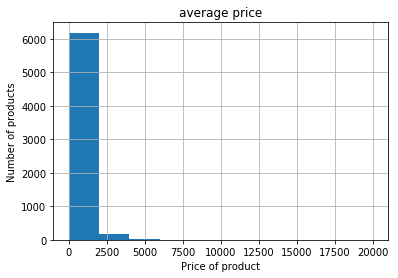

In [53]:
df2.hist("average price")
plt.xlabel("Price of product")
plt.ylabel("Number of products")

In [54]:
availability = df2.groupby("prices.availability")["id"].count()
availability

prices.availability
In Stock           5380
Out of Stock        328
To Be Announced     712
Name: id, dtype: int64

Text(0, 0.5, 'Number of Products')

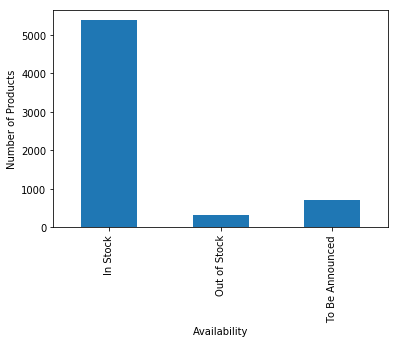

In [55]:
availability.plot.bar()
plt.xlabel("Availability")
plt.ylabel("Number of Products")

In [56]:
conditions = df2.groupby("prices.condition")["id"].count()
conditions

prices.condition
New            5518
Refurbished     172
Undefined       378
Used            352
Name: id, dtype: int64

Text(0, 0.5, 'Number of Products')

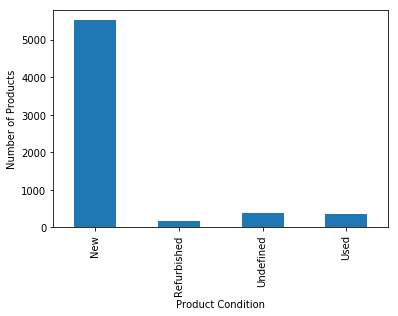

In [57]:
conditions.plot.bar()
plt.xlabel("Product Condition")
plt.ylabel("Number of Products")

Text(0, 0.5, 'Number of products')

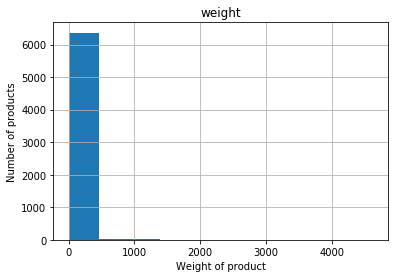

In [58]:
df2.hist("weight", bins=10)
plt.xlabel("Weight of product")
plt.ylabel("Number of products")

The relationsship between average price the product's weight

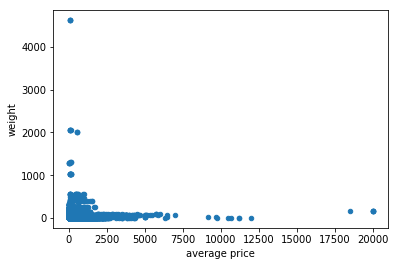

In [59]:
df2.plot.scatter(x="average price", y="weight")

The relationship between price and condition of products.

Text(0, 0.5, 'Average Price')

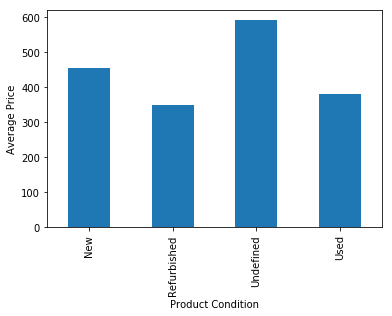

In [60]:
df2.groupby("prices.condition")["average price"].mean().plot.bar()
plt.xlabel("Product Condition")
plt.ylabel("Average Price")

The relationship between product availability and the average price.

Text(0, 0.5, 'Average Price')

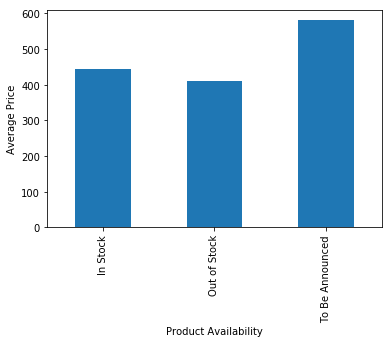

In [61]:
df2.groupby("prices.availability")["average price"].mean().plot.bar()
plt.xlabel("Product Availability")
plt.ylabel("Average Price")

The relationship between product weight and its availability.

Text(0, 0.5, 'Weight')

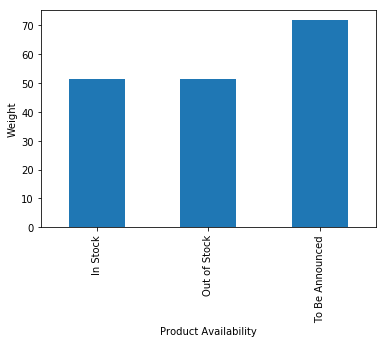

In [62]:
df2.groupby("prices.availability")["weight"].mean().plot.bar()
plt.xlabel("Product Availability")
plt.ylabel("Weight")

The following is about finding which vendor has the most expensive products.

In [63]:
df3 = df2.groupby("prices.merchant")["average price"].mean().sort_values()
df3

prices.merchant
t-dimension7                              1.000000
Essential Supply                          5.000000
onlycellphone                             6.990000
cable-n-chargers                          7.450000
ditech_store                              7.950000
bettysstealsndeals                        7.980000
Mobile Top Deal                           7.990000
pasbuy                                    7.990000
Santa Monica Wireless                     8.172000
eewb2mc8                                  8.500000
Buywireless                               8.990000
grliquidators16                           9.000000
1topwire                                  9.445000
Xcess Limited                             9.510000
loothive                                  9.990000
hollitronic                              10.000000
cyber_hub                                10.290000
knick_46                                 10.990000
$aveTronix - Walmart.com                 11.000000
alex_sari      

The average price for the following 10 vendors is higher than other vendors.

In [64]:
df2[df2["average price"] > 9000].groupby("prices.merchant")["average price"].mean()

prices.merchant
Amazon.com               19997.990
Bestbuy.com              14399.990
Video & Audio  Center    19997.990
Walt's TV                19997.990
Walts TV                 19997.990
bhphotovideo.com         14847.960
bigvalueinc              10691.775
deals-all-year           10499.990
homedepot.com             9426.370
samyscamera02             9749.950
Name: average price, dtype: float64

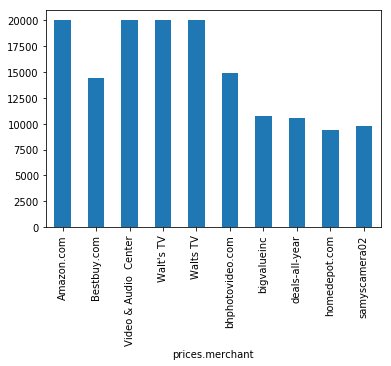

In [65]:
df2[df2["average price"] > 9000].groupby("prices.merchant")["average price"].mean().plot.bar()